# Práctica 3

Bruno Corcuera Sánchez
bruno.sanchez1@udc.es

In [4]:
import pandas as pd
import numpy as np

df = pd.read_json('USD-data.json')
df.head(5)

,timestamp inicial,precio inicio,precio mas alto,precio mas bajo,precio fin,volumen,timestamp final,volumen en cuotas,numero de compras,volumen de dolares,volumen de euros
0,2020-01-03 08:00:00,1.1154,1.1200,1.1154,1.1182,37309.48,2020-01-03 08:59:59.999,41775.464275,31,20419.46,22858.822356
1,2020-01-03 09:00:00,1.1182,1.1182,1.1151,1.1151,2132.61,2020-01-03 09:59:59.999,2384.431292,5,2036.69,2277.401075
2,2020-01-03 10:00:00,1.1151,1.1172,1.1151,1.1151,1950.83,2020-01-03 10:59:59.999,2175.391533,4,10.00,11.172000
3,2020-01-03 11:00:00,1.1136,1.1151,1.1136,1.1141,310.53,2020-01-03 11:59:59.999,346.107438,4,232.00,258.656430
4,2020-01-03 12:00:00,1.1126,1.1133,1.1126,1.1133,394.52,2020-01-03 12:59:59.999,439.130428,3,0.00,0.000000


<Axes: >

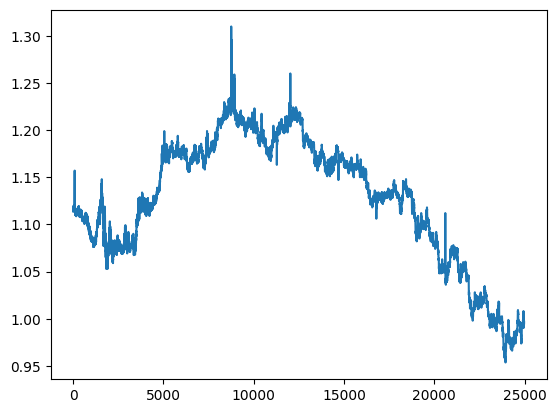

In [5]:
df['precio fin'].plot()

In [6]:
df.describe()

,timestamp inicial,precio inicio,precio mas alto,precio mas bajo,precio fin,volumen,timestamp final,volumen en cuotas,numero de compras,volumen de dolares,volumen de euros
count,24970,24970.000000,24970.000000,24970.000000,24970.000000,2.497000e+04,24970,2.497000e+04,24970.000000,2.497000e+04,2.497000e+04
mean,2021-06-07 09:52:59.014818048,1.126497,1.127797,1.125329,1.126459,1.588138e+06,2021-06-07 10:52:58.645466880,1.831407e+06,3249.635603,7.412968e+05,8.552054e+05
min,2020-01-03 08:00:00,0.953600,0.955400,0.953500,0.953600,0.000000e+00,2020-01-03 08:59:59.999000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2020-09-19 22:15:00,1.080000,1.082000,1.078000,1.080000,7.440733e+04,2020-09-19 23:14:59.999000064,8.558465e+04,298.000000,3.189642e+04,3.638405e+04
50%,2021-06-07 13:30:00,1.133000,1.134000,1.132000,1.133000,7.911794e+05,2021-06-07 14:29:59.999000064,8.722955e+05,2046.000000,3.359175e+05,3.709915e+05
75%,2022-02-22 21:45:00,1.178800,1.179900,1.177700,1.178700,2.069755e+06,2022-02-22 22:44:59.999000064,2.302447e+06,4215.000000,9.509889e+05,1.063618e+06
max,2022-11-10 00:00:00,1.309800,4.950000,1.269500,1.309800,4.694843e+07,2022-11-10 00:59:59.999000,5.784383e+07,53917.000000,2.354437e+07,2.905002e+07
std,NaN,0.066949,0.071274,0.066925,0.066935,2.435379e+06,NaN,2.898230e+06,4291.602485,1.189478e+06,1.413589e+06


#### Continuidad de los datos


In [8]:
import pandas as pd

# Initial size
print(f'Initial size:\t{df.shape[0]}')

# Generating a range of dates with an interval of one hour
hour_range = pd.date_range(start=df['timestamp final'].min(), end=df['timestamp final'].max(), freq='1H')

# Checking for missing hours, if an hour is missing, that hour is filled with the same values as the previous hour
df = df.set_index('timestamp final').reindex(hour_range).ffill().reset_index()

print(f'Final size:\t{df.shape[0]}')
# 'timestamp final' is still called 'timestamp final'
df.head(5)


Initial size:	24970
Final size:	25001


/tmp/ipykernel_25002/1090331720.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hour_range = pd.date_range(start=df['timestamp final'].min(), end=df['timestamp final'].max(), freq='1H')


,index,timestamp inicial,precio inicio,precio mas alto,precio mas bajo,precio fin,volumen,volumen en cuotas,numero de compras,volumen de dolares,volumen de euros
0,2020-01-03 08:59:59.999,2020-01-03 08:00:00,1.1154,1.1200,1.1154,1.1182,37309.48,41775.464275,31.0,20419.46,22858.822356
1,2020-01-03 09:59:59.999,2020-01-03 09:00:00,1.1182,1.1182,1.1151,1.1151,2132.61,2384.431292,5.0,2036.69,2277.401075
2,2020-01-03 10:59:59.999,2020-01-03 10:00:00,1.1151,1.1172,1.1151,1.1151,1950.83,2175.391533,4.0,10.00,11.172000
3,2020-01-03 11:59:59.999,2020-01-03 11:00:00,1.1136,1.1151,1.1136,1.1141,310.53,346.107438,4.0,232.00,258.656430
4,2020-01-03 12:59:59.999,2020-01-03 12:00:00,1.1126,1.1133,1.1126,1.1133,394.52,439.130428,3.0,0.00,0.000000


Extracción de nuevas características

In [11]:
# Convert time to sine/cosine
df['timestamp_radians'] = 2 * np.pi * df['index'].dt.hour / 24
df['sin_hour'] = np.sin(df['timestamp_radians'])
df['cos_hour'] = np.cos(df['timestamp_radians'])
df = df.drop(['timestamp_radians'], axis=1)  # Drop time column in radians

# Convert day of the week to sine/cosine
df['day_number_radians'] = 2 * np.pi * df['index'].dt.dayofweek / 7
df['sin_day'] = np.sin(df['day_number_radians'])
df['cos_day'] = np.cos(df['day_number_radians'])
df = df.drop(['day_number_radians'], axis=1)  # Drop day in radians column

# New features to add to the data
df['mean'] = df['precio fin'].rolling(window=7).mean()  # Mean price of last 7 hours
df['standard_deviation'] = df['precio fin'].rolling(window=7).std()  # Standard deviation of last 7 hours

lag_values = [1, 2]
for lag in lag_values:
    df[f'autocorrelation_lag_{lag}'] = df['precio fin'].shift(lag)  # Autocorrelations of the past three hours

df = df.dropna()  # Remove first rows with NaNs

df.head(8)


,index,timestamp inicial,precio inicio,precio mas alto,precio mas bajo,precio fin,volumen,volumen en cuotas,numero de compras,volumen de dolares,volumen de euros,sin_hour,cos_hour,sin_day,cos_day,mean,standard_deviation,autocorrelation_lag_1,autocorrelation_lag_2
6,2020-01-03 14:59:59.999,2020-01-03 14:00:00,1.1135,1.1135,1.1135,1.1135,200.34,223.078590,1.0,0.00,0.000000,-0.500000,-8.660254e-01,-0.433884,-0.900969,1.115200,0.001841,1.1171,1.1133
7,2020-01-03 15:59:59.999,2020-01-03 15:00:00,1.1186,1.1187,1.1155,1.1181,445.36,497.658656,6.0,284.11,317.780285,-0.707107,-7.071068e-01,-0.433884,-0.900969,1.115186,0.001814,1.1135,1.1171
8,2020-01-03 16:59:59.999,2020-01-03 16:00:00,1.1153,1.1191,1.1142,1.1163,718.84,802.820127,32.0,264.10,295.504234,-0.866025,-5.000000e-01,-0.433884,-0.900969,1.115357,0.001861,1.1181,1.1135
9,2020-01-03 17:59:59.999,2020-01-03 17:00:00,1.1190,1.1195,1.1162,1.1194,1888.24,2113.661187,9.0,1824.94,2043.005727,-0.965926,-2.588190e-01,-0.433884,-0.900969,1.115971,0.002395,1.1163,1.1181
10,2020-01-03 18:59:59.999,2020-01-03 18:00:00,1.1161,1.1195,1.1154,1.1154,1380.94,1541.425042,8.0,67.27,75.283971,-1.000000,-1.836970e-16,-0.433884,-0.900969,1.116157,0.002273,1.1194,1.1163
11,2020-01-03 19:59:59.999,2020-01-03 19:00:00,1.1155,1.1188,1.1155,1.1188,1723.01,1927.542053,3.0,1674.06,1872.938328,-0.965926,2.588190e-01,-0.433884,-0.900969,1.116943,0.002061,1.1154,1.1194
12,2020-01-03 20:59:59.999,2020-01-03 20:00:00,1.1199,1.1199,1.1188,1.1188,1469.52,1645.495448,2.0,1469.52,1645.495448,-0.866025,5.000000e-01,-0.433884,-0.900969,1.117186,0.002180,1.1188,1.1154
13,2020-01-03 21:59:59.999,2020-01-03 21:00:00,1.1182,1.1182,1.1149,1.1149,7742.60,8632.257905,4.0,10.05,11.237910,-0.707107,7.071068e-01,-0.433884,-0.900969,1.117386,0.001820,1.1188,1.1188


#### División Datos

In [13]:
fdate_limit_train = '2022-08-31 23:59:59'
date_limit_test = '2022-09-01 00:00:00'

df_train = df[df['index'] <= fdate_limit_train]
df_test = df[df['index'] >= date_limit_test]


print("Train: {}\nTest: {}".format(df_train.shape,df_test.shape))

Train: (23313, 19)
Test: (1681, 19)


### Estandarización 

In [14]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['volumen', 'volumen en cuotas', 'numero de compras', 'volumen de dolares','volumen de euros']
scaler = StandardScaler()

df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])

df_train.describe()


/tmp/ipykernel_25002/1057668608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[columns_to_normalize] = scaler.fit_transform(df_train[columns_to_normalize])
/tmp/ipykernel_25002/1057668608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])


,index,timestamp inicial,precio inicio,precio mas alto,precio mas bajo,precio fin,volumen,volumen en cuotas,numero de compras,volumen de dolares,volumen de euros,sin_hour,cos_hour,sin_day,cos_day,mean,standard_deviation,autocorrelation_lag_1,autocorrelation_lag_2
count,23313,23313,23313.000000,23313.000000,23313.000000,23313.000000,2.331300e+04,2.331300e+04,2.331300e+04,2.331300e+04,2.331300e+04,23313.000000,2.331300e+04,23313.000000,23313.000000,23313.000000,23313.000000,23313.000000,23313.000000
mean,2021-05-03 06:59:59.999000320,2021-05-03 05:59:46.565435648,1.136580,1.137915,1.135387,1.136539,4.876543e-18,9.753085e-18,1.462963e-17,7.802468e-17,-1.462963e-17,-0.000304,-5.764226e-17,-0.000228,0.001478,1.136554,0.001312,1.136544,1.136549
min,2020-01-03 14:59:59.999000,2020-01-03 14:00:00,0.990300,0.991500,0.989200,0.990300,-6.432027e-01,-6.273767e-01,-7.475443e-01,-6.138733e-01,-5.998682e-01,-1.000000,-1.000000e+00,-0.974928,-0.900969,0.991629,0.000000,0.990300,0.990300
25%,2020-09-02 10:59:59.999000064,2020-09-02 10:00:00,1.092500,1.094900,1.091000,1.092500,-6.203116e-01,-6.054394e-01,-6.922677e-01,-5.938306e-01,-5.806176e-01,-0.707107,-7.071068e-01,-0.781831,-0.900969,1.092586,0.000647,1.092600,1.092600
50%,2021-05-03 06:59:59.999000064,2021-05-03 06:00:00,1.142000,1.143000,1.140800,1.142000,-3.380837e-01,-3.397418e-01,-2.951371e-01,-3.520168e-01,-3.525126e-01,0.000000,-1.836970e-16,0.000000,-0.222521,1.141700,0.001048,1.142000,1.142000
75%,2022-01-01 02:59:59.999000064,2022-01-01 02:00:00,1.181200,1.182200,1.179800,1.181000,2.018116e-01,1.755043e-01,2.352012e-01,1.789020e-01,1.551085e-01,0.707107,7.071068e-01,0.781831,0.623490,1.181057,0.001615,1.181000,1.181000
max,2022-08-31 22:59:59.999000,2022-08-31 22:00:00,1.309800,4.950000,1.269500,1.309800,1.815367e+01,1.879308e+01,1.146700e+01,1.869313e+01,1.939930e+01,1.000000,1.000000e+00,0.974928,1.000000,1.273529,0.030359,1.309800,1.309800
std,NaN,NaN,0.057384,0.062630,0.057419,0.057372,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,1.000021e+00,0.707163,7.070805e-01,0.707467,0.706775,0.057328,0.001267,0.057366,0.057360


In [15]:
def sliding_window(data, labels, input_width, label_width=1, offset=1):
    x = []
    y = []

    for i in range(len(data) - input_width - label_width - offset + 1):
        _x = data[i:i + input_width]
        _y = labels[i + input_width + offset:i + input_width + offset + label_width]
        x.append(_x)
        y.append(_y)

    x, y = np.array(x),np.array(y)

    if len(x.shape) == 2:
        x = x[:,:,np.newaxis]

    if len(y.shape) == 2:
        y = y[:,:,np.newaxis]

    return x, y

In [16]:
# Se elimina las cilumnas de 'timestamp inicial', 'index'
df_train = df_train.iloc[:, ~df.columns.isin(['timestamp inicial', 'index'])]
df_test = df_test.iloc[:, ~df.columns.isin(['timestamp inicial', 'index'])]


In [19]:
input_width = 24  # The window will be the data of the last 3 days
label_width = 1  # Predicting 1 hour only
offset = 6  # 6 hours ahead
target_labels = 'precio fin' 

x_train, y_train = sliding_window(df_train.values, df_train[target_labels].values , input_width=input_width, label_width=label_width, offset=offset)
x_test, y_test = sliding_window(df_test.values, df_test[target_labels].values, input_width, label_width, offset)

print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)

print('x_test shape :', x_test.shape)
print('y_test shape :', y_test.shape)

x_train shape : (23283, 24, 17)
y_train shape : (23283, 1, 1)
x_test shape : (1651, 24, 17)
y_test shape : (1651, 1, 1)


In [21]:
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM, Reshape,BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model_LSTM = Sequential()
model_LSTM.add(LSTM(units=128, return_sequences=True, input_shape=(input_width, x_train.shape[-1])))
model_LSTM.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model_LSTM.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model_LSTM.add(LSTM(units=50, return_sequences=True))
model_LSTM.add(LSTM(units=32, return_sequences=True))
model_LSTM.add(LSTM(units=32))
model_LSTM.add(Dense(units=label_width))

model_GRU = Sequential()
model_GRU.add(GRU(units=50, return_sequences=True, input_shape=(input_width, x_train.shape[-1])))
model_GRU.add(GRU(units=50, return_sequences=True))
model_GRU.add(GRU(units=25))
model_GRU.add(Dense(units=label_width))


model_DENSE = Sequential()
model_DENSE.add(Flatten(input_shape=(input_width, x_train.shape[-1])))
model_DENSE.add(Dense(256))
model_DENSE.add(Dense(256))
model_DENSE.add(Dense(128))
model_DENSE.add(Dense(128))
model_DENSE.add(Dense(64))
model_DENSE.add(Dense(64))
model_DENSE.add(Dense(units=1))

model_LSTM.summary()
model_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 128)           74752     
                                                                 
 bidirectional_2 (Bidirectio  (None, 24, 100)          71600     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 24, 100)          60400     
 nal)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 24, 50)            30200     
                                                                 
 lstm_10 (LSTM)              (None, 24, 32)            10624     
                                                                 
 lstm_11 (LSTM)              (None, 32)               

In [13]:
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  mode='min')

# Function to compile the three models with the same parameters
comp = lambda model: model.compile(loss=tf.losses.MeanSquaredError(),
                                   optimizer=tf.optimizers.Adam(0.001),
                                   metrics=[tf.metrics.MeanAbsoluteError()])

# Compile the three models using the function
comp(model_LSTM)
comp(model_DENSE)
comp(model_GRU)

# Training
history = model_LSTM.fit(x_train, y_train, epochs=50,
                         batch_size=2048,
                         shuffle=True,
                         validation_split=0.3,  # Using validation set (30% of the training set)
                         callbacks=[early_stopping])

history2 = model_DENSE.fit(x_train, y_train, epochs=256,
                           batch_size=2048,
                           shuffle=True,
                           validation_split=0.3,
                           callbacks=[early_stopping])

history3 = model_GRU.fit(x_train, y_train, epochs=50,
                         batch_size=2048,
                         shuffle=True,
                         validation_split=0.3,
                         callbacks=[early_stopping])


Epoch 1/50


2023-12-19 18:58:54.563942: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-19 18:58:55.057867: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe7d8162b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-19 18:58:55.057911: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-12-19 18:58:55.070846: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1703008735.146251   18985 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - 10s 493ms/step - loss: 0.4583 - mean_absolute_error: 0.5486 - val_loss: 0.0857 - val_mean_absolute_error: 0.2892
Epoch 2/50
8/8 [==============================] - 2s 301ms/step - loss: 0.0234 - mean_absolute_error: 0.1313 - val_loss: 0.0045 - val_mean_absolute_error: 0.0570
Epoch 3/50
8/8 [==============================] - 2s 302ms/step - loss: 0.0080 - mean_absolute_error: 0.0744 - val_loss: 0.0250 - val_mean_absolute_error: 0.1514
Epoch 4/50
8/8 [==============================] - 2s 301ms/step - loss: 0.0046 - mean_absolute_error: 0.0546 - val_loss: 0.0040 - val_mean_absolute_error: 0.0478
Epoch 5/50
8/8 [==============================] - 2s 301ms/step - loss: 0.0032 - mean_absolute_error: 0.0495 - val_loss: 0.0094 - val_mean_absolute_error: 0.0856
Epoch 6/50
8/8 [==============================] - 2s 301ms/step - loss: 0.0024 - mean_absolute_error: 0.0365 - val_loss: 0.0088 - val_mean_absolute_error: 0.0823
Epoch 7/50
8/8 [======================

##### 1. Evaluación del Rendimiento:

In [14]:
# Evauate the performance of each model
mse_lstm = model_LSTM.evaluate(x_test, y_test)
mse_dense = model_DENSE.evaluate(x_test, y_test)
mse_gru = model_GRU.evaluate(x_test, y_test)

print(f'Mean Absolute Error on Test Set LSTM: {mse_lstm[1]}')
print(f'Mean Absolute Error on Test Set GRU: {mse_gru[1]}')
print(f'Mean Absolute Error on Test Set DENSE: {mse_dense[1]}')

52/52 [==============================] - 0s 3ms/step - loss: 0.0063 - mean_absolute_error: 0.0782
Mean Absolute Error on Test Set LSTM: 0.17238977551460266
Mean Absolute Error on Test Set GRU: 0.07822738587856293
Mean Absolute Error on Test Set DENSE: 0.005555673502385616


52/52 [==============================] - 1s 2ms/step


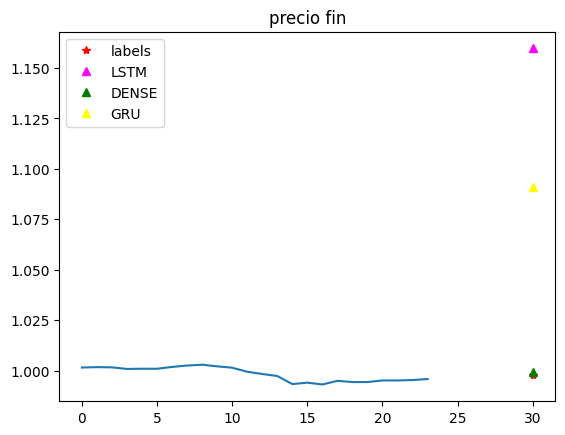

In [15]:
from itertools import chain
import matplotlib.pyplot as plt


def plot_prediction(feed_data, expected_result, model_results, target_label, offset=1, index=1, names =('LSTM','DENSE','GRU') ):
    f_data_x = np.arange(feed_data.shape[1])
    e_data_x = np.arange(expected_result.shape[1]) + offset

    # Plot input data
    plt.plot(f_data_x, feed_data[index])

    # Plot expected result
    plt.plot(e_data_x, expected_result[index], '*r', label='labels')
    colors = ('magenta', 'green', 'yellow')

    # Plot each model result with a different color and legend
    for i, model_result in enumerate(model_results):
        #color = plt.cm.get_cmap('tab10')(i+5)  # Use a different color for each model
        plt.plot(e_data_x, model_result[index], '^', label=f'{names[i]}', color=colors[i])

    plt.legend()
    plt.title(target_label)
    plt.show()


L_model_result_test = model_LSTM.predict(x_test)
D_model_result_test = model_DENSE.predict(x_test)
G_model_result_test = model_GRU.predict(x_test)

target_index_test = df_test.columns.get_loc(target_labels)
target_index_train = df_train.columns.get_loc(target_labels)

# Test
plot_prediction(x_test[:, :, target_index_test], y_test, (L_model_result_test,D_model_result_test,G_model_result_test), target_labels, input_width + offset, index=0)

##### Final model: Dense

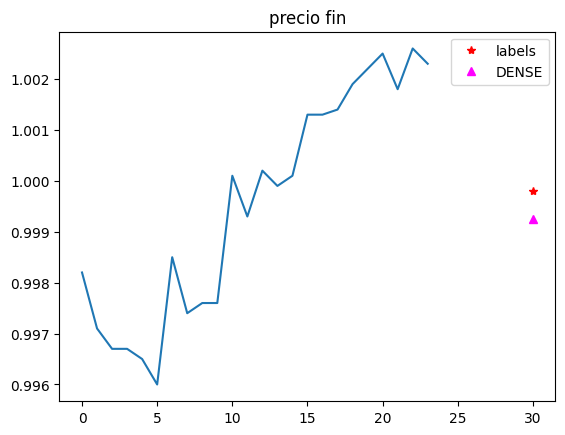

In [35]:
plot_prediction(x_test[:, :, target_index_test], y_test, [D_model_result_test], target_labels, input_width + offset, index=436, names = ['DENSE'])

Baseline 1: Predicction las value input:

In [17]:
import tensorflow as tf

mae = tf.keras.metrics.MeanAbsoluteError()
mse = tf.keras.metrics.MeanSquaredError()

# Prediction always equal to the last input value (6 hours before the predicted value)
baseline_last_value = x_test[:, 0, 3]  # Selecting the prices of the last value of each window and using it as the prediction value
mae.update_state(y_test, baseline_last_value)
mse.update_state(y_test, baseline_last_value)

print(f'Mean Absolute Error of Baseline 1: {mae.result().numpy()}')
print(f'Mean Squared Error of Baseline 1: {mse.result().numpy()}')
print(f'Mean Absolute Error of the Model: {mse_dense[1]}')
print(f'Mean Squared Error of the Model: {mse_dense[0]}')

# The MSE is lower in the DENSE model, but that does not necessarily mean it makes better predictions.
# MSE measures the distance between the predicted and actual values. The distance may be smaller, 
# but what matters is whether it accurately predicts the price trend over time,

Mean Absolute Error del Baseline 1: 0.01437857374548912
Mean Squared Error del Baseline 1: 0.00031699411920271814
Mean Absolute Error del Modelo: 0.005555673502385616
Mean Squared Error del Modelo: 6.101655526435934e-05


Baseline 2: Predicción de la Media de los Valores de Entrada:

In [18]:
# Prediction always equal to the mean of the input values
mae = tf.keras.metrics.MeanAbsoluteError()
mse = tf.keras.metrics.MeanSquaredError()

baseline_mean_value = x_test.mean(axis=1)[:, 3]
mae.update_state(y_test, baseline_mean_value)
mse.update_state(y_test, baseline_mean_value)

print(f'Mean Absolute Error del Baseline 2: {mae.result().numpy()}')
print(f'Mean Squared Error del Baseline 2: {mse.result().numpy()}')
print(f'Mean Absolute Error del Modelo: {mse_dense[1]}')
print(f'Mean Squared Error del Modelo: {mse_dense[0]}')


Mean Absolute Error del Baseline 2: 0.014232847839593887
Mean Squared Error del Baseline 2: 0.0003098161250818521
Mean Absolute Error del Modelo: 0.005555673502385616
Mean Squared Error del Modelo: 6.101655526435934e-05


###  Bias analisis:

In [19]:
y_test_pred = D_model_result_test # test predictions with dense
y_test_pred.shape

(1651, 1)

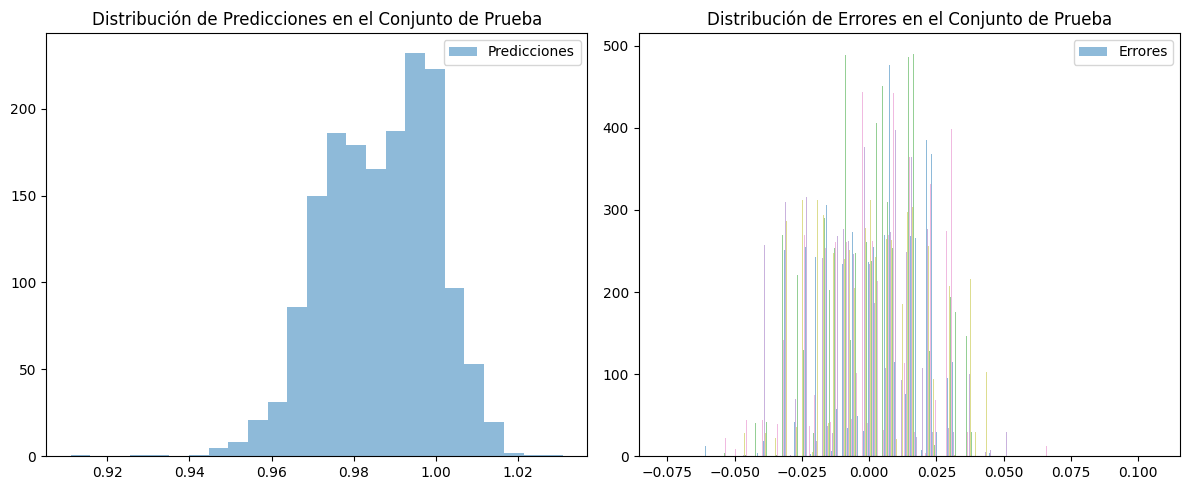

In [20]:
import matplotlib.pyplot as plt

# Histograms of predictions and errors in the test set
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Predictions
ax1.hist(y_test_pred[:, 0], label='Predictions', alpha=0.5, bins=25)
ax1.legend()
ax1.set_title('Distribution of Predictions in the Test Set')

# Subplot 2: Errors
ax2.hist(y_test[:, 0] - y_test_pred[:, 0], label='Errors', alpha=0.5, bins=25)
ax2.legend()
ax2.set_title('Distribution of Errors in the Test Set')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


### Binary Model
New model that predicts 0 if the dollar goes down, 1 if it goes up within 6 hours


In [21]:
y_test_flat = y_test[:, 0, 0]  # Flatten labels, convert to a list
y_test_bin = (y_test_flat[1:] > y_test_flat[:-1]).astype(int)  # Create binary labels (0 if price goes down, 1 if it goes up)


y_train_flat = y_train[:, 0, 0] 
y_train_bin = (y_train_flat[1:] > y_train_flat[:-1]).astype(int)


In [22]:
# Model
model_DENSE_binary = Sequential()
model_DENSE_binary.add(Flatten(input_shape=(input_width, x_train.shape[-1])))
model_DENSE_binary.add(Dense(256))
model_DENSE_binary.add(Dense(256))
model_DENSE_binary.add(Dense(128))
model_DENSE_binary.add(Dense(128))
model_DENSE_binary.add(Dense(64))
model_DENSE_binary.add(Dense(64))
model_DENSE_binary.add(Dense(units=1))
model_DENSE_binary.add(Activation('sigmoid')) 
# Binary classification problem, predicting whether it belongs to class 1 (price goes up) or class 0 (price goes down),
# using sigmoid activation function - range between 0 and 1

# Compile the model
model_DENSE_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=[keras.metrics.AUC(), keras.metrics.Recall()])

history = model_DENSE_binary.fit(x_train[1:], y_train_bin, epochs=512, # using binary y_train
                                  batch_size=2048,
                                  shuffle=True,
                                  validation_split=0.3)


Epoch 1/512
8/8 [==============================] - 2s 40ms/step - loss: 1.4932 - auc: 0.5017 - recall: 0.4095 - val_loss: 0.9605 - val_auc: 0.4905 - val_recall: 0.9966
Epoch 2/512
8/8 [==============================] - 0s 13ms/step - loss: 0.7662 - auc: 0.5090 - recall: 0.3485 - val_loss: 0.7083 - val_auc: 0.4863 - val_recall: 0.5587
Epoch 3/512
8/8 [==============================] - 0s 12ms/step - loss: 0.7097 - auc: 0.5125 - recall: 0.5276 - val_loss: 0.6429 - val_auc: 0.5302 - val_recall: 0.0055
Epoch 4/512
8/8 [==============================] - 0s 15ms/step - loss: 0.6945 - auc: 0.5071 - recall: 0.1005 - val_loss: 0.6866 - val_auc: 0.4914 - val_recall: 0.3456
Epoch 5/512
8/8 [==============================] - 0s 13ms/step - loss: 0.6874 - auc: 0.5295 - recall: 0.2517 - val_loss: 0.6555 - val_auc: 0.5306 - val_recall: 0.0080
Epoch 6/512
8/8 [==============================] - 0s 14ms/step - loss: 0.6854 - auc: 0.5359 - recall: 0.0200 - val_loss: 0.6634 - val_auc: 0.5218 - val_recall:

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

predict = model_DENSE_binary.predict(x_test[1:])
y_pred_bin = (predict > 0.37).astype(int)

# Binary clasification metrics
accuracy = accuracy_score(y_test_bin, y_pred_bin)
precision = precision_score(y_test_bin, y_pred_bin)
recall = recall_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)
roc_auc = roc_auc_score(y_test_bin, y_pred_bin)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

52/52 [==============================] - 0s 1ms/step
Accuracy: 0.47515151515151516
Precision: 0.4460708782742681
Recall: 0.7975206611570248
F1 Score: 0.5721343873517787
ROC AUC Score: 0.5096910665092483


In [ ]:
# Calculate the absolute error in dollars
absolute_error = abs(y_test_pred[:, 0] - y_test[:, 0, 0])

# Convert absolute error to cents
error_cents = absolute_error * 100

# Print the average amount of error in cents
print(f'Average error amount: {error_cents.mean():.2f} cents')


Ganancia Esperada

In [25]:
# poner colores en el print 
class color:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [27]:
capital_initial = 1000  # Initial capital in dollars
current_capital = 0
current_dollars = capital_initial / y_test[0, 0]
num_dollars = 1

print('\033[93m' + '📈💸🤑 Start Capital: {}$'.format(capital_initial) + '\033[0m' + '\n')
# Simulate operations based on predictions
for i in range(1, len(y_pred_bin)):
    predict_previous = y_pred_bin[i - 1]
    predict = y_pred_bin[i]
    if predict == 1:
        # Buy if an increase in price is expected
        if current_capital > y_test[i - 1, 0]:
            current_capital -= y_test[i - 1, 0]  # Subtract previous price as expense
            current_dollars += 1
            print('\033[91m' + '💵Total Capital: ' + '▼ {:.4f}$'.format(current_capital + float(current_dollars * y_test[i - 1, 0])) + '\033[0m' +
                  '\033[94m' + '\t💲 Dollar Price: {:.4f}'.format(float(y_test[i - 1, 0])) + '\033[0m' +
                  '\tDollars: {:.2f}'.format(float(current_dollars)) +
                  '\t\tAvailable capital: {:.2f}$'.format(float(current_capital)))

    else:
        if current_dollars > 1:
            # Sell if a decrease in price is expected
            current_capital += y_test[i - 1, 0]  # Add previous price as profit
            current_dollars -= 1
            print('\033[92m' + '💵Total Capital: ' + '▲ {:.4f}$'.format(current_capital + float(current_dollars * y_test[i - 1, 0])) + '\033[0m' +
                  '\033[94m' + '\t💲 Dollar Price: {:.4f}'.format(float(y_test[i - 1, 0])) + '\033[0m' +
                  '\tDollars: {:.2f}'.format(float(current_dollars)) +
                  '\t\tAvailable capital: {:.2f}$'.format(float(current_capital)))

# Print the final capital
final_capital = round(float(current_capital) + float(current_dollars * y_test[i - 1, 0]), 4)
print('\033[93m' + '\n\nStart Capital:\t{}$\nEnd Capital:\t{}$'.format(capital_initial, final_capital) + '\033[0m')
print('💰📈💸Profit:\t' + '\033[93m' + '{}$\t{}%'.format(final_capital - capital_initial, round((final_capital * 100) / capital_initial - 100, 2)) + '\033[0m')


📈💸🤑 Start Capital: 1000$

💵Total Capital: ▲ 999.3987$	💲 Dollar Price: 0.9972	Dollars: 1001.2		Available capital: 1.0$
💵Total Capital: ▲ 1002.1019$	💲 Dollar Price: 0.9999	Dollars: 1000.2		Available capital: 2.0$
💵Total Capital: ▼ 1001.1017$	💲 Dollar Price: 0.9989	Dollars: 1001.2		Available capital: 1.0$
💵Total Capital: ▼ 1000.4009$	💲 Dollar Price: 0.9982	Dollars: 1002.2		Available capital: 0.0$
💵Total Capital: ▲ 996.9934$	💲 Dollar Price: 0.9948	Dollars: 1001.2		Available capital: 0.99$
💵Total Capital: ▲ 997.0935$	💲 Dollar Price: 0.9949	Dollars: 1000.2		Available capital: 1.99$
💵Total Capital: ▼ 997.1935$	💲 Dollar Price: 0.995	Dollars: 1001.2		Available capital: 0.99$
💵Total Capital: ▲ 997.1935$	💲 Dollar Price: 0.995	Dollars: 1000.2		Available capital: 1.99$
💵Total Capital: ▲ 996.9935$	💲 Dollar Price: 0.9948	Dollars: 999.2		Available capital: 2.98$
💵Total Capital: ▼ 996.7936$	💲 Dollar Price: 0.9946	Dollars: 1000.2		Available capital: 1.99$
💵Total Capital: ▼ 997.0937$	💲 Dollar Price: 0.99

/tmp/ipykernel_18902/3633093947.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(color.OKGREEN+'💵Total Capital: '+f'▲ {round(capital_actual[0]+float(dolares_actuales*y_test[i - 1, 0]),4)}$'+color.ENDC
/tmp/ipykernel_18902/3633093947.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  + color.OKBLUE + f'\t💲 Dollar Price: {round(float(y_test[i - 1, 0]),4)}' + color.ENDC
/tmp/ipykernel_18902/3633093947.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pr